In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
df = pd.read_csv('malicious_phish.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'malicious_phish.csv'

In [ ]:
df.shape

(651191, 2)

In [ ]:
df.size

1302382

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


In [ ]:
df.isnull().any()

url     False
type    False
dtype: bool

In [ ]:
df.dtypes

url     object
type    object
dtype: object

In [ ]:
df=pd.get_dummies(columns = ["type"],data=df)

In [ ]:
df

,url,type_benign,type_defacement,type_malware,type_phishing
0,br-icloud.com.br,False,False,False,True
1,mp3raid.com/music/krizz_kaliko.html,True,False,False,False
2,bopsecrets.org/rexroth/cr/1.htm,True,False,False,False
3,http://www.garage-pirenne.be/index.php?option=...,False,True,False,False
4,http://adventure-nicaragua.net/index.php?optio...,False,True,False,False
...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,False,False,False,True
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,False,False,False,True
651188,www.gamespot.com/xbox360/action/deadspace/,False,False,False,True
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),False,False,False,True


In [ ]:
df['type_benign'] = df['type_benign'].astype(int)

df['type_defacement']=df['type_defacement'].astype(int)

df['type_malware']=df['type_malware'].astype(int)

df['type_phishing']=df['type_phishing'].astype(int)

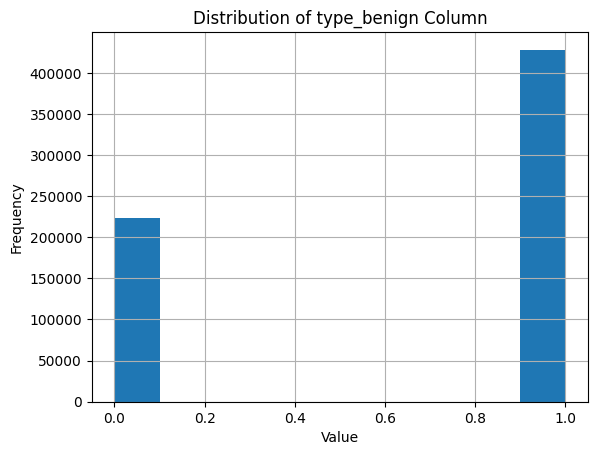

In [ ]:
df['type_benign'].hist(bins=10)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of type_benign Column')
plt.show()


In [ ]:
df

,url,type_benign,type_defacement,type_malware,type_phishing
0,br-icloud.com.br,0,0,0,1
1,mp3raid.com/music/krizz_kaliko.html,1,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,1,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,0,1,0,0
4,http://adventure-nicaragua.net/index.php?optio...,0,1,0,0
...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,0,0,0,1
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,0,0,0,1
651188,www.gamespot.com/xbox360/action/deadspace/,0,0,0,1
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),0,0,0,1


taking a 25000 from the whole dataset 

In [ ]:
subset_df = df.sample(n=25000, random_state=42)

In [ ]:
subset_df.shape

(25000, 5)

In [ ]:
subset_df.head(10)


,url,type_benign,type_defacement,type_malware,type_phishing
536448,http://37.49.226.178/deusbins/deus.sh4,0,0,1,0
40630,medical-dictionary.thefreedictionary.com/Galt+...,1,0,0,0
630496,www.jscape.com/sshfactory/,0,0,0,1
426724,http://www.wsnc.org.au/component/jcalpro/view/983,0,1,0,0
184034,virtualtourist.com/travel/North_America/Canada...,1,0,0,0
72922,evri.com/person/donald-ballard-0x87e96,1,0,0,0
91279,http://www.sweethome.com.gr/index.php?option=c...,0,1,0,0
618950,www.msnbc.msn.com/?id=3475953,0,0,0,1
432803,http://www.mruniquespaving.co.uk/paved-drivewa...,0,1,0,0
171655,http://torcache.net/torrent/4646B1C156C01B1D1B...,1,0,0,0


In [ ]:
X_text = subset_df['url']
y = subset_df[['type_benign', 'type_defacement', 'type_malware', 'type_phishing']]

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X_text)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
Cmodel_1 = RandomForestClassifier()

In [21]:
multi_classifier = MultiOutputClassifier(Cmodel_1)

In [ ]:
multi_classifier.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier())

In [ ]:
predictions = multi_classifier.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      3338
           1       0.98      0.87      0.92       740
           2       0.99      0.83      0.90       251
           3       0.90      0.56      0.69       671

   micro avg       0.95      0.90      0.92      5000
   macro avg       0.95      0.81      0.87      5000
weighted avg       0.94      0.90      0.91      5000
 samples avg       0.90      0.90      0.90      5000



C:\Users\Abhinav\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
# 25K Training Dataset

Accuracy: 0.8952


In [26]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(multi_classifier, file)